# Libraries and Packages

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration


In [100]:
# Uploading data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Nat_Gas.csv')
df.head()


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


Time series index

In [101]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)
df.head()

/tmp/ipython-input-101-1239743144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


**Resampling to monthly frequency and calculate the mean closing price**

In [102]:
df.resample('M').mean()

/tmp/ipython-input-102-1818180140.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()


,Prices
Dates,
2020-10-31,10.10
2020-11-30,10.30
2020-12-31,11.00
2021-01-31,10.90
2021-02-28,10.90
2021-03-31,10.90
2021-04-30,10.40
2021-05-31,9.84
2021-06-30,10.00


**7 day rolling average of closing price**

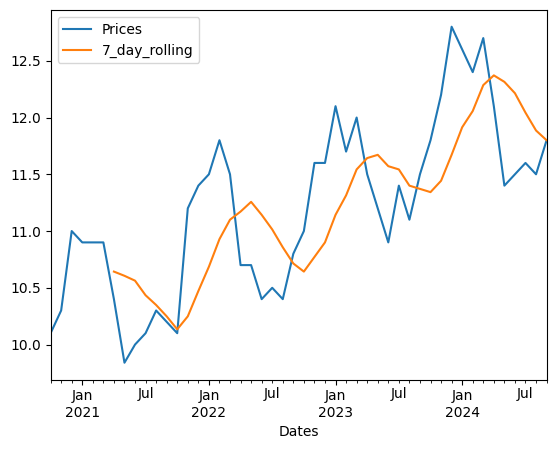

In [103]:
df['7_day_rolling'] = df['Prices'].rolling(window=7).mean()
df[['Prices','7_day_rolling']].plot()
plt.show()

**Find out the highest average month**

In [104]:
df.resample('M').mean()['Prices'].idxmax()

/tmp/ipython-input-104-2602343869.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()['Prices'].idxmax()


Timestamp('2023-12-31 00:00:00')

**Calculate daily returns**

In [105]:
df['daily_returns'] = df['Prices'].pct_change() * 100

**Days with more than 10% change in price**

In [106]:
df[df['daily_returns'] > 10].head()

,Prices,7_day_rolling,daily_returns
Dates,,,
2021-11-30,11.2,10.248571,10.891089


#Data Visualization

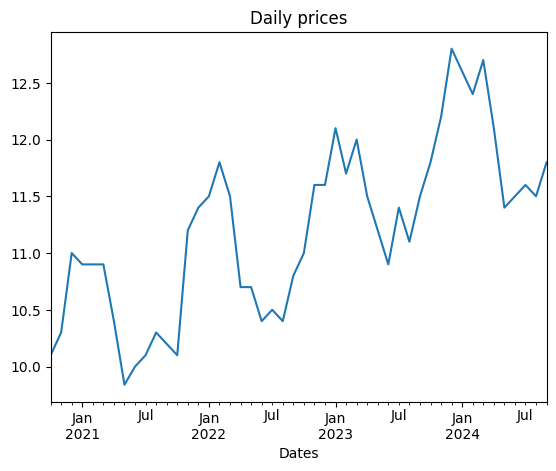

In [76]:
# Daily price plot
df['Prices'].plot(title='Daily prices')
plt.show()

**Plotting monthly volume**

/tmp/ipython-input-81-2381560864.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').sum()['Prices'].plot()


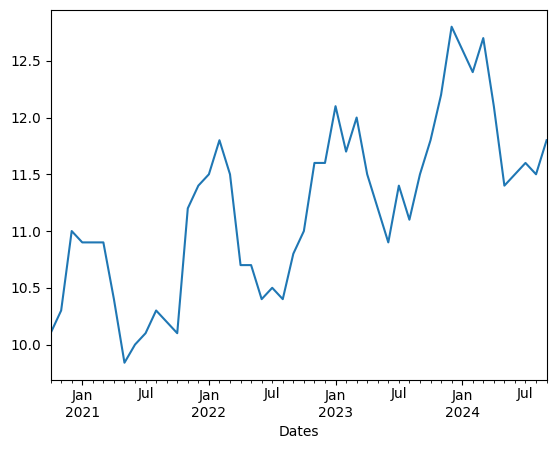

In [81]:
df.resample('M').sum()['Prices'].plot()
plt.show()

**Correlation between the 30 day rolling volume and the prices.**

In [86]:
df['30_day_rolling_vol'] = df['Prices'].rolling(window=30).mean()
df[['Prices','30_day_rolling_vol']].corr()

,Prices,30_day_rolling_vol
Prices,1.000000,0.310461
30_day_rolling_vol,0.310461,1.000000


# Data Manipulation

In [87]:
# dentify missing values

df.isnull().sum()

,0
Prices,0
7_day_rolling,6
daily_returns,1
30_day_rolling_vol,29


In [88]:
# Fill missing values
df['30_day_rolling_vol'].fillna(method='bfill',inplace=True)

/tmp/ipython-input-88-354317486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['30_day_rolling_vol'].fillna(method='bfill',inplace=True)
/tmp/ipython-input-88-354317486.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['30_day_rolling_vol'].fillna(method='bfill',inplace=True)


In [89]:
#Interpolate missing 7 day rolling
df['7_day_rolling'].interpolate(inplace=True)

/tmp/ipython-input-89-3482554538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['7_day_rolling'].interpolate(inplace=True)


**Feature engineering - lagged values**

In [90]:
df['closed_lag1'] = df['Prices'].shift(1)
df['closed_lag1'] = df['Prices'].shift(2)

#Seasonality

/tmp/ipython-input-96-1554052538.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Prices'].resample('M').mean())


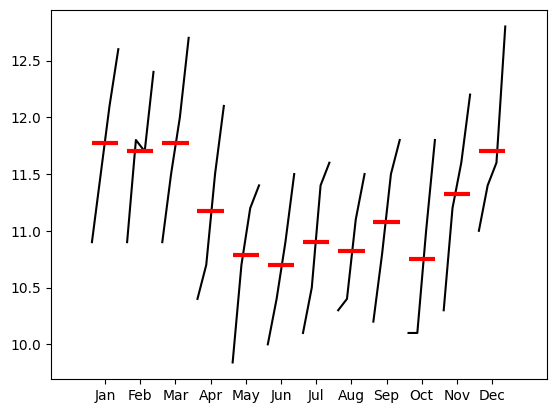

In [96]:
# Plotting the monthly seasonality
month_plot(df['Prices'].resample('M').mean())
plt.show()

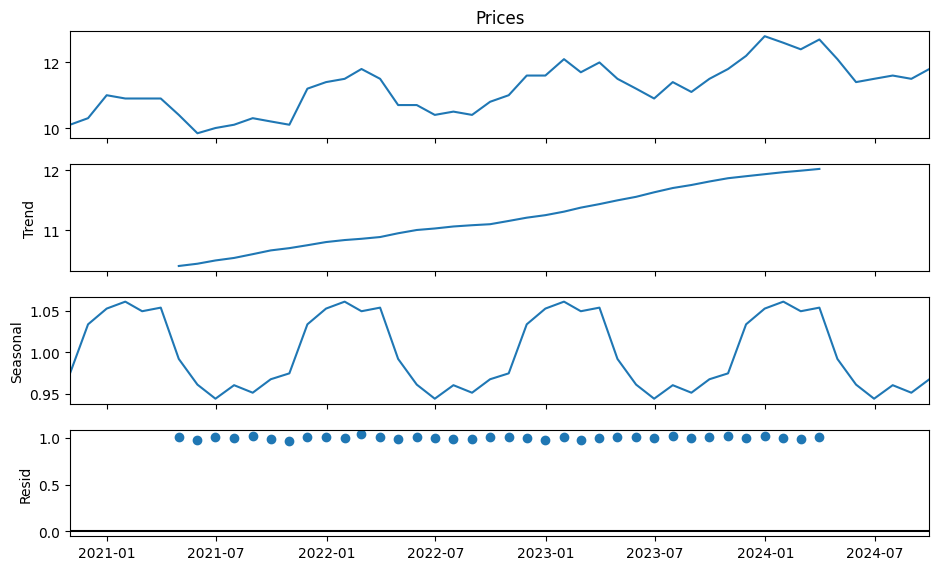

In [95]:
# Seasonal decomposition plots for Net gas data
decomposition = seasonal_decompose(df['Prices'], model='multiplicative', period=12)
fig = decomposition.plot()
fig.set_size_inches(10,6)
plt.show()

#Autocorrelation

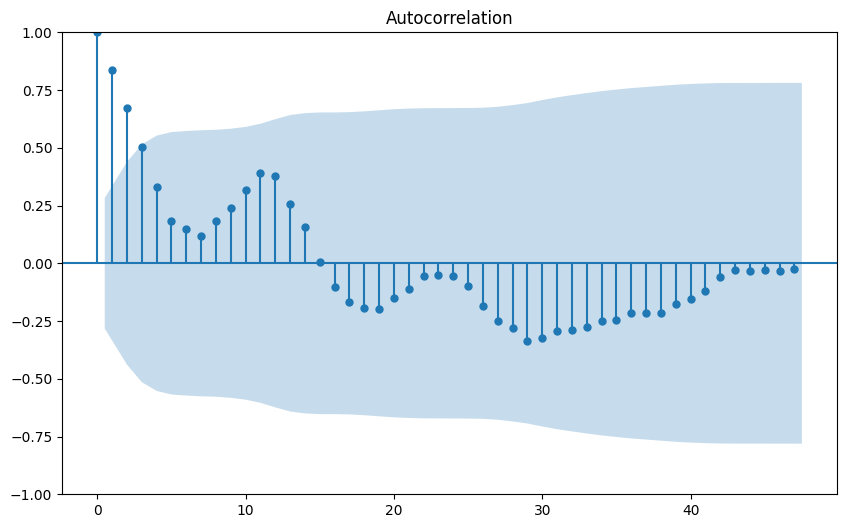

In [107]:
#Plot the ACF
fig,ax = plt.subplots(figsize=(10,6))
plot_acf(df['Prices'], lags=47,ax=ax)
plt.show()